Aim:
Use the K-Means clustering algorithm for Color-Compression

Theory:
K-means clustering is an unsupervised machine learning algorithm that is used to group similar data points together in a dataset. The goal of this algorithm is to partition a given set of observations into k clusters (where k is a pre-defined number of clusters) based on the similarity between the observations.

Algorithm
   1. Initialization: Choose k random data points to be the initial centroids of the clusters.

   2. Assign each data point to the nearest centroid: Calculate the distance between each data point and each centroid, and assign each data point to the centroid it is closest to.

   3. Recalculate the centroids: Once all the data points have been assigned to a centroid, recalculate the centroid of each cluster by taking the mean of all the data points assigned to that cluster.

   4. Repeat steps 2 and 3 until convergence: Repeat steps 2 and 3 until the centroids no longer change or a maximum number of iterations has been reached.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

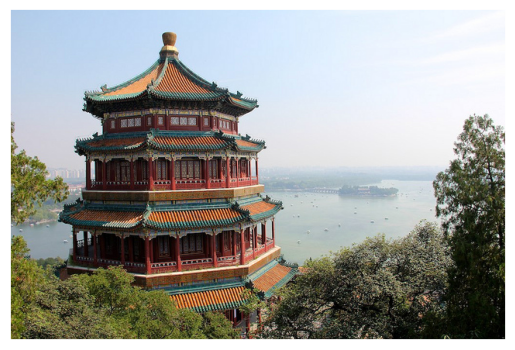

In [28]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [29]:
data = china / 255.0
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [30]:
def plot_pixels(data, title, colors = None, N = 10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color = colors, marker='.')
    ax[0].set(xlabel = 'red', ylabel = 'green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color = colors, marker='.')
    ax[1].set(xlabel = 'red', ylabel = 'blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

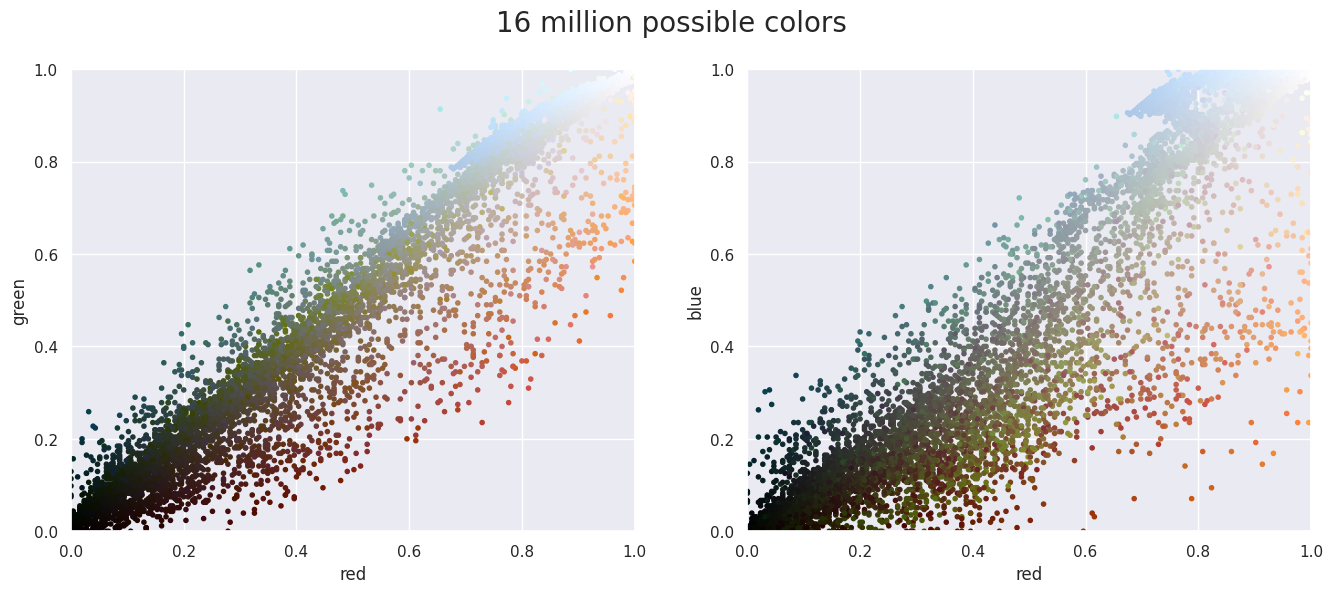

In [31]:
plot_pixels(data, title='16 million possible colors')

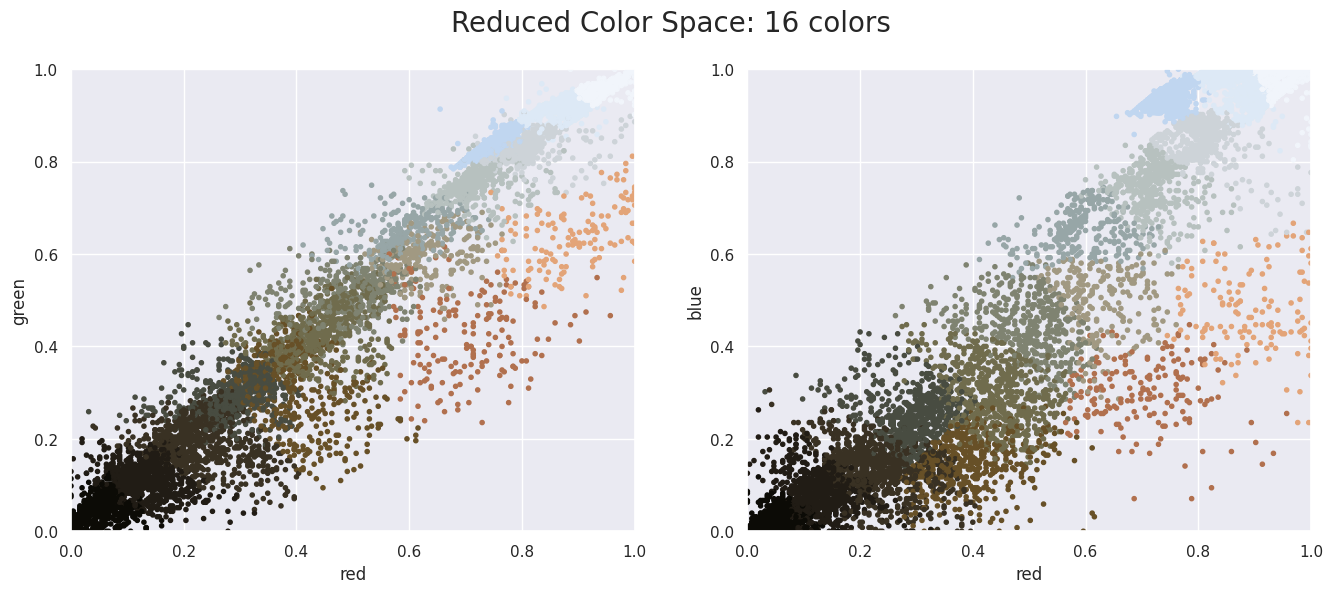

In [32]:
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors = new_colors, title = 'Reduced Color Space: 16 colors')

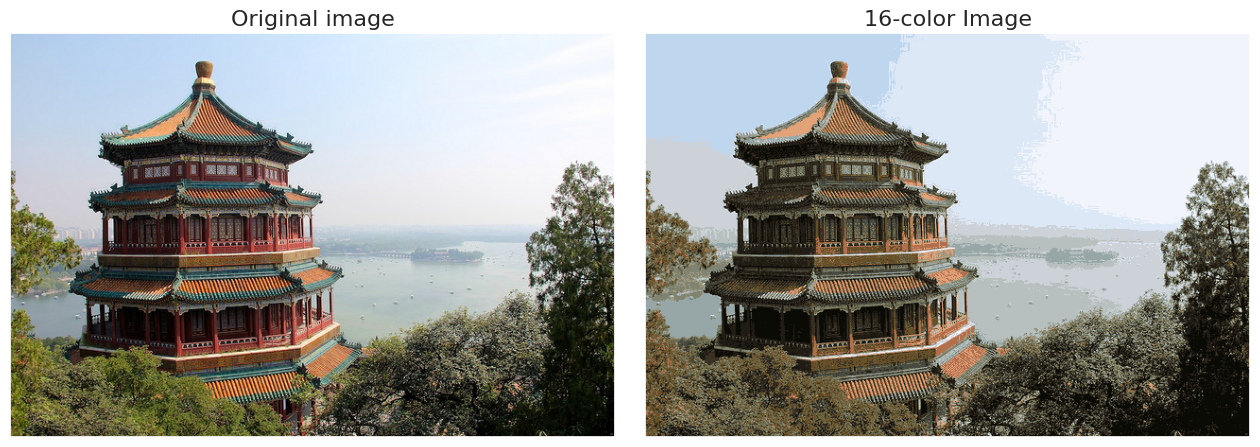

In [33]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);
